In [1]:
!pip install -q bitstring

from operator import xor
import bitstring

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

from random import SystemRandom
from scipy.special import entr
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from glob import glob

from nistrng import *

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

4.838122663468241


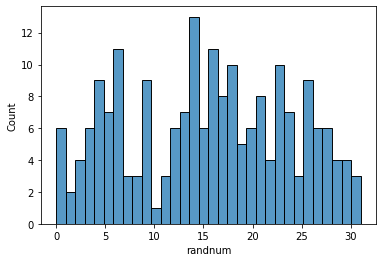

In [2]:
NUM_OF_ELEMENTS=32
SIZE = 200
randomint = np.random.randint(0,NUM_OF_ELEMENTS,SIZE)
df = pd.DataFrame({'randnum':randomint})
ax = sns.histplot(data=df, x="randnum", bins=NUM_OF_ELEMENTS)

vals = np.array([h.get_height() for h in ax.patches])

pA = vals / vals.sum()
Shannon2 = -np.sum(pA*np.log2(pA))
print(Shannon2)

4.907038938097655


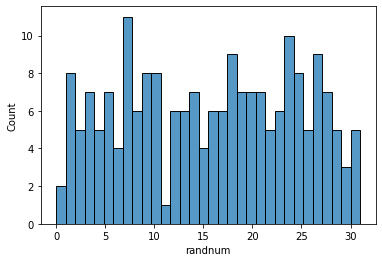

In [3]:
cryptogen = SystemRandom()
cryptogen.randrange(NUM_OF_ELEMENTS)

randomint_sec = [cryptogen.randrange(NUM_OF_ELEMENTS) for i in range(SIZE)]

df_sec = pd.DataFrame({'randnum':randomint_sec})
ax = sns.histplot(data=df_sec, x="randnum", bins=NUM_OF_ELEMENTS)

vals_sec = np.array([h.get_height() for h in ax.patches])
pA = vals_sec / vals_sec.sum()
Shannon2 = -np.sum(pA*np.log2(pA))
print(Shannon2)

In [4]:
mat_contents = sio.loadmat('/Users/ozgur/Dropbox/2021_6G ML/research-3-channel-estimation/src/data.mat')
trainData = mat_contents['trainData']

max_val = trainData.max()
min_val = trainData.min()

def get_entropy():
    
    selected_imgs = cryptogen.randrange(trainData.shape[0])
    selected_pixel_1 = cryptogen.randrange(trainData.shape[1])
    selected_pixel_2 = cryptogen.randrange(trainData.shape[3])
    
    '''
    selected_imgs = np.random.randint(0,trainData.shape[0])
    selected_pixel_1 = np.random.randint(0,trainData.shape[1])
    selected_pixel_2 = np.random.randint(0,trainData.shape[3])
    '''
    selected_val = trainData[0]

    selected_val = trainData[selected_imgs,selected_pixel_1,0,selected_pixel_2]
    selected_val = (selected_val - min_val)/(max_val - min_val)
    selected_val = np.int64(18446744073709551615*selected_val)

    return selected_val

step 1


  0%|          | 0/200 [00:00<?, ?it/s]

4.85026313796609


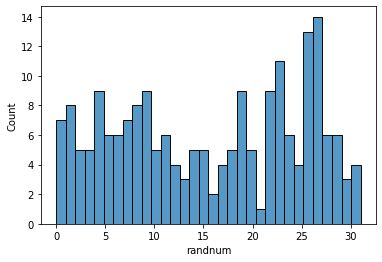

In [5]:
randomint_sec2 = []

print('step 1')

for i in tqdm(range(SIZE)):
    entropy_val = get_entropy()
    np.random.SeedSequence(entropy_val)
    tmp = np.random.randint(0,NUM_OF_ELEMENTS)
    #print(tmp)
    randomint_sec2.append(tmp)
    
df_sec2 = pd.DataFrame({'randnum':randomint_sec2})
ax = sns.histplot(data=df_sec2, x="randnum", bins=NUM_OF_ELEMENTS)

vals_sec2 = np.array([h.get_height() for h in ax.patches])
pA = vals_sec2 / vals_sec2.sum()
Shannon2 = -np.sum(pA*np.log2(pA))
print(Shannon2)

In [6]:
files = glob('/Users/ozgur/Downloads/SpectrumSenseTrainingDataNetwork/TrainingData/NR*.png')
num_of_files = len(files)
FRAME_SIZE = 50

def get_entropy_spectrum(c, k, sel_img_idx):
    num_of_files = len(files)
    #sel_img = files[cryptogen.randrange(num_of_files)]
    #sel_img = files[np.random.randint(0,num_of_files)]
    sel_img = files[sel_img_idx]
    
    img = plt.imread(sel_img)
    
    #start_x = cryptogen.randrange(img.shape[0] - frame_size)
    #start_y = cryptogen.randrange(img.shape[1] - frame_size)
    
    start_x = np.random.randint(img.shape[0] - c)
    start_y = np.random.randint(img.shape[1] - k)
    
    selected_spectogram = img[start_x:start_x+c, start_y:start_y+k, :].flatten()
    
    random_bits = bitstring.BitArray(float=selected_spectogram[0], length=32)
    
    for i in range(1,selected_spectogram.shape[0]):
        tmp = bitstring.BitArray(float=selected_spectogram[i], length=32) 
        random_bits = random_bits ^ tmp # xor
        random_bits = random_bits ^ random_bits << 13
        random_bits = random_bits ^ random_bits >> 17
        random_bits = random_bits ^ random_bits << 5
        #print(random_bits)
    
    return random_bits.uintle, random_bits

tmp_rand,random_bits = get_entropy_spectrum(1,2,1)
print(tmp_rand, random_bits.uint, random_bits.uintbe, random_bits.uintle, random_bits.uintne)

2433366584 943327889 943327889 2433366584 2433366584


# Analysis

In [7]:
# http://www.reallyreallyrandom.com/photonic/technical/jpegs/
'''
vals1 = []
vals2 = []
vals3 = []

#NUM_OF_ELEMENTS = 10
for i in tqdm(range(len(files))):
    fname = files[i]
    img = plt.imread(sel_img)
    vals1 = np.concatenate((vals1,img[:,:,0].flatten().T), axis=None)
    vals2 = np.concatenate((vals2,img[:,:,1].flatten().T), axis=None)
    vals3 = np.concatenate((vals3,img[:,:,2].flatten().T), axis=None)
    
df_vals = pd.DataFrame({'vals1':vals1,'vals2':vals2,'vals3':vals3})
print(df_vals.head(10))
print(df_vals.shape)
ax = sns.histplot(data=df_vals, x="vals1", bins=NUM_OF_ELEMENTS)
plt.show()
ax = sns.histplot(data=df_vals, x="vals2", bins=NUM_OF_ELEMENTS)
plt.show()
ax = sns.histplot(data=df_vals, x="vals3", bins=NUM_OF_ELEMENTS)
#plt.legend()
plt.show()
'''

'\nvals1 = []\nvals2 = []\nvals3 = []\n\n#NUM_OF_ELEMENTS = 10\nfor i in tqdm(range(len(files))):\n    fname = files[i]\n    img = plt.imread(sel_img)\n    vals1 = np.concatenate((vals1,img[:,:,0].flatten().T), axis=None)\n    vals2 = np.concatenate((vals2,img[:,:,1].flatten().T), axis=None)\n    vals3 = np.concatenate((vals3,img[:,:,2].flatten().T), axis=None)\n    \ndf_vals = pd.DataFrame({\'vals1\':vals1,\'vals2\':vals2,\'vals3\':vals3})\nprint(df_vals.head(10))\nprint(df_vals.shape)\nax = sns.histplot(data=df_vals, x="vals1", bins=NUM_OF_ELEMENTS)\nplt.show()\nax = sns.histplot(data=df_vals, x="vals2", bins=NUM_OF_ELEMENTS)\nplt.show()\nax = sns.histplot(data=df_vals, x="vals3", bins=NUM_OF_ELEMENTS)\n#plt.legend()\nplt.show()\n'

(256, 256, 3)


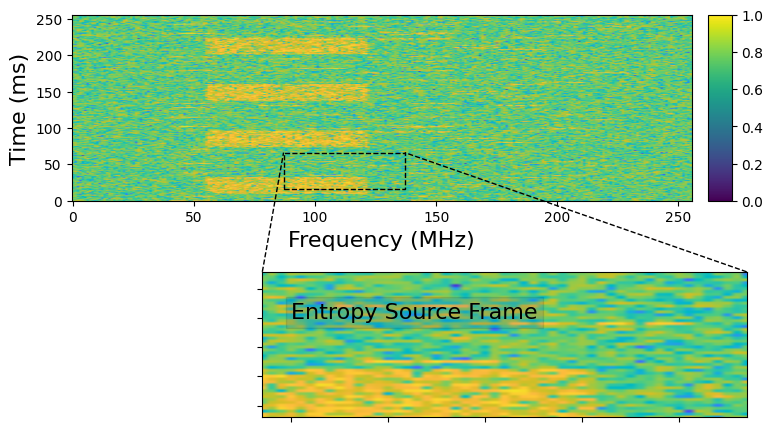

In [19]:
np.random.seed(31)
sel_img = files[np.random.randint(0,len(files))]
    
input_img = plt.imread(sel_img)
print(input_img.shape)

start_x = np.random.randint(input_img.shape[0] - FRAME_SIZE)
start_y = np.random.randint(input_img.shape[1] - FRAME_SIZE)

fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111)
heatmap = plt.imshow(input_img,origin='lower')
plt.ylabel('Time (ms)', fontsize=16)
plt.xlabel('Frequency (MHz)', fontsize=16)
ax.set_aspect(0.30)
cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.03,ax.get_position().height])
plt.colorbar(heatmap, cax=cax)
#plt.savefig(PROJECT_FOLDER + 'input_' + str(i) + '.pdf' ,bbox_inches='tight')

axins = zoomed_inset_axes(ax, 4, loc=4, bbox_to_anchor=(0.8,-1.2,.3,.3), bbox_transform=ax.transAxes)
axins.imshow(input_img)
axins.set_aspect(0.30)
axins.set_xlim(start_x, start_x + FRAME_SIZE)
axins.set_ylim(start_y, start_y + FRAME_SIZE)

#axins.invert_yaxis()
plt.xticks(visible=False)
plt.yticks(visible=False)
#plt.ylabel('Time (ms)', fontsize=16)
#plt.xlabel('Frequency (MHz)', fontsize=16)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="k", ls="--")
plt.draw()

plt.text(90,50, 'Entropy Source Frame',fontsize=16, bbox=dict(facecolor='blue', alpha=0.1))

plt.savefig("entropy_source.png",dpi=100,bbox_inches='tight')

plt.show()

In [16]:
entropy_values = []
c_list = np.linspace(1, 250, num=250).astype(int)
k_list = np.linspace(1, 250, num=250).astype(int)

c_list = [30]
k_list = [30]


EXPERIMENT_SIZE = 1
NUM_OF_ELEMENTS = 512
SIZE = 512

print(NUM_OF_ELEMENTS,SIZE)

for exp_no in tqdm(range(EXPERIMENT_SIZE)):
    np.random.shuffle(c_list)
    np.random.shuffle(k_list)
    for c_k_idx in tqdm(range(len(c_list)), leave=False): # zip(c_list, k_list):
        c = c_list[c_k_idx]
        k = k_list[c_k_idx]
        
        randomint_sec3 = []
        fig = plt.figure()
        for i in tqdm(range(SIZE),desc='Exp: ' + str(exp_no) + ' - c: ' + str(c) + ' k: ' + str(k), leave=False):
            sel_img_idx = np.random.randint(0,num_of_files)
            entropy_val = get_entropy_spectrum(c,k,sel_img_idx)
            np.random.SeedSequence(entropy_val)
            
            tmp = np.random.randint(0, NUM_OF_ELEMENTS)
            randomint_sec3.append(tmp)

        df_sec3 = pd.DataFrame({'randnum':randomint_sec3})
        ax = sns.histplot(data=df_sec3, x="randnum", bins=NUM_OF_ELEMENTS)

        vals_sec3 = np.array([h.get_height() for h in ax.patches])
        pA = vals_sec3 / vals_sec3.sum()
        Shannon2 = -np.sum(pA*np.log2(pA))
        entropy_values.append(Shannon2)
        #print(Shannon2)
        plt.close(fig)
        
        df_ent_tmp = pd.DataFrame({'c':[c], 'k':[k], 'ent':[Shannon2]})
        df_ent_tmp.to_csv("ent_experiments.csv",index=True, header=False, mode='a')

512 512


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Exp: 0 - c: 30 k: 30:   0%|          | 0/512 [00:00<?, ?it/s]

/var/folders/rh/1c0lrj_x0x956417g86lc4ph0000gn/T/ipykernel_55281/3983316378.py:37: RuntimeWarning: divide by zero encountered in log2
  Shannon2 = -np.sum(pA*np.log2(pA))
/var/folders/rh/1c0lrj_x0x956417g86lc4ph0000gn/T/ipykernel_55281/3983316378.py:37: RuntimeWarning: invalid value encountered in multiply
  Shannon2 = -np.sum(pA*np.log2(pA))


In [18]:
#np.savetxt('tmp_rand3.txt', randomint_sec3, fmt='%d', delimiter=' ')
max_len =0
f = open('randomint_sec3.txt','w')
for i in range(len(randomint_sec3)):
    f.write("{0:b}".format(randomint_sec3[i]).zfill(9) + '\n')
    if len("{0:b}".format(randomint_sec3[i])) > max_len:
        max_len = len("{0:b}".format(randomint_sec3[i]))
f.close()

print(max_len)

!python rand_testsuite.py randomint_sec3.txt

9
The statistical test of the Binary Expansion of e
2.01. Frequency Test:								 (0.013328328780817566, True)
2.02. Block Frequency Test:							 (0.2433543540286743, True)
2.03. Run Test:										 (0.7891905722371335, True)
2.04. Run Test (Longest Run of Ones): 				 (0.3657268021697269, True)
2.05. Binary Matrix Rank Test:						 (0.6834250391587453, True)
2.06. Discrete Fourier Transform (Spectral) Test:	 (0.330390048848776, True)
Non-Overlapping Template Test DEBUG BEGIN:
	Length of input:		 4608
	Value of Mean (µ):		 1.109375
	Value of Variance(σ):	 1.087646484375
	Value of W:				 [2. 1. 1. 1. 1. 1. 0. 1.]
	Value of xObs:			 1.92682379349046
	P-Value:				 0.9831736177735952
DEBUG END.
2.07. Non-overlapping Template Matching Test:		 (0.9831736177735952, True)
2.08. Overlappong Template Matching Test: 			 (0.3374707060505503, True)
2.09. Universal Statistical Test:					 (-1.0, False)
2.10. Linear Complexity Test:						 (0.8087869595476275, True)
2.11. Serial Test:									 ((0.917938

In [ ]:
max_len =0
f = open('randomint.txt','w')
for i in range(len(randomint)):
    f.write("{0:b}".format(randomint[i]).zfill(8) + '\n')
    if len("{0:b}".format(randomint[i])) > max_len:
        max_len = len("{0:b}".format(randomint[i]))
f.close()

print(max_len)

!python rand_testsuite.py randomint.txt

In [ ]:
max_len =0
f = open('randomint_sec2.txt','w')
for i in range(len(randomint_sec2)):
    f.write("{0:b}".format(randomint_sec2[i]).zfill(8) + '\n')
    if len("{0:b}".format(randomint_sec2[i])) > max_len:
        max_len = len("{0:b}".format(randomint_sec2[i]))
f.close()

print(max_len)

!python rand_testsuite.py randomint_sec2.txt

In [ ]:
np.savetxt('tmp_rand.txt', randomint, fmt='%d', delimiter=' ')
!dieharder -f tmp_rand.txt -a

In [ ]:
np.savetxt('tmp_rand.txt', randomint_sec2, fmt='%d', delimiter=' ')
!dieharder -f tmp_rand.txt -a

In [ ]:
binary_sequence = pack_sequence(randomint)
eligible_battery = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)

print("Eligible test from NIST-SP800-22r1a:")
for name in eligible_battery.keys():
    print("-" + name)
# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
print("Test results:")
for result, elapsed_time in results:
    if result.passed:
        print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
    else:
        print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")


In [ ]:
binary_sequence = pack_sequence(randomint_sec)
eligible_battery = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)

print("Eligible test from NIST-SP800-22r1a:")
for name in eligible_battery.keys():
    print("-" + name)
# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
print("Test results:")
for result, elapsed_time in results:
    if result.passed:
        print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
    else:
        print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")



In [ ]:
binary_sequence = pack_sequence(randomint_sec2)
eligible_battery = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)

print("Eligible test from NIST-SP800-22r1a:")
for name in eligible_battery.keys():
    print("-" + name)
# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
print("Test results:")
for result, elapsed_time in results:
    if result.passed:
        print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
    else:
        print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")

In [ ]:
binary_sequence = pack_sequence(randomint_sec3)
eligible_battery = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)

print("Eligible test from NIST-SP800-22r1a:")
for name in eligible_battery.keys():
    print("-" + name)
# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
print("Test results:")
for result, elapsed_time in results:
    if result.passed:
        print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
    else:
        print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")